# Module 11 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [7]:
# Extract all rows of data
mars_temp_table = soup.find('table', class_='table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [12]:
# Create an empty list
mars_data = []
rows = soup.find_all('tr', class_ = 'data-row')

# Loop through the scraped data to create a list of rows
for row in rows:
    cells = row.find_all('td')
    row_data = [cell.get_text(strip=True) for cell in cells]
    mars_data.append(row_data)

In [16]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_data, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])  

In [17]:
# Confirm DataFrame was created successfully
mars_df 

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [18]:
# Examine data type of each column
mars_df_type = mars_df.dtypes
mars_df_type

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [19]:
# Change data types for data analysis
convert_data_type_dict = {
    'id':int,
    'sol':int,
    'ls':int,
    'month':int,
    'min_temp':float,
    'pressure':float}

mars_df = mars_df.astype(convert_data_type_dict)

mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

In [20]:
# Confirm type changes were successful by examining data types again
mars_df_type = mars_df.dtypes
mars_df_type

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [21]:
# 1. How many months are there on Mars?
total_mars_mths = mars_df['month'].max()
print(f"{total_mars_mths} months exist on Mars")

12 months exist on Mars


In [22]:
# 2. How many Martian days' worth of data are there?
total_martian_days = mars_df['sol'].count()
print(f"{total_martian_days} days worth of data exist in the scraped dataset")

1867 days worth of data exist in the scraped dataset


In [25]:
# 3. What is the average low temperature by month?
avg_temp = mars_df.groupby('month')['min_temp'].mean()
print(f'The average temperature by month is: \n{avg_temp}')

The average temperature by month is: 
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


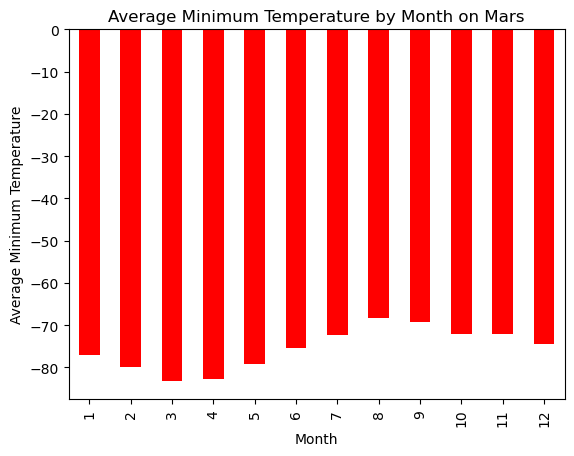

In [31]:
# Plot the average temperature by month
avg_temp.plot(kind='bar', xlabel='Month', ylabel='Average Minimum Temperature', title='Average Minimum Temperature by Month on Mars', color='red')
plt.show()

In [36]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month = avg_temp.idxmin()
hottest_month = avg_temp.idxmax()

print(f"On average, month {coldest_month} has the coldest minimum temperature on Mars, and month {hottest_month} is the warmest. But it is always very cold there in human terms!")

On average, month 3 has the coldest minimum temperature on Mars, and month 8 is the warmest. But it is always very cold there in human terms!


In [37]:
# 4. Average pressure by Martian month
avg_pressure = mars_df.groupby('month')['pressure'].mean()
print(f'The average pressure by month is: \n{avg_pressure}')
print(f"Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth")

The average pressure by month is: 
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64
Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth


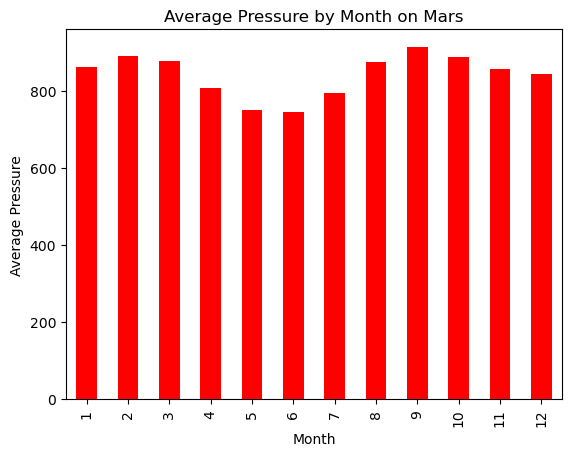

In [38]:
# Plot the average pressure by month
avg_pressure.plot(kind='bar', xlabel='Month', ylabel='Average Pressure', title='Average Pressure by Month on Mars', color='red')
plt.show()

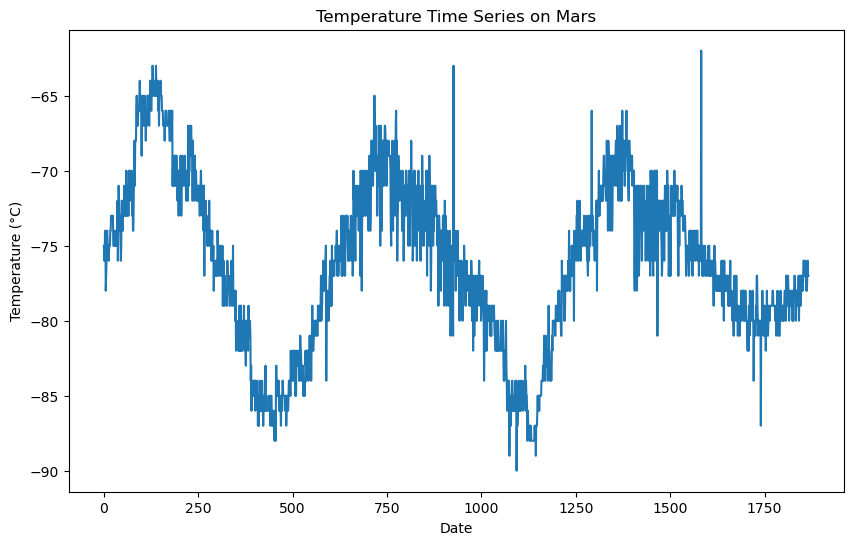

In [40]:
# 5. How many terrestrial (earth) days are there in a Martian year?
mars_df['min_temp'].plot(figsize=(10, 6), xlabel='Date', ylabel='Temperature (°C)', title='Temperature Time Series on Mars')
plt.show()

In [42]:
print(f"The distance from peak 1 (approx. day 125) to peak 3 (approx. day 1475) is 1350 days. This represents a 2 year period, and so divding by 2 gives an esimated number of 675 Earth days to a Martian year. This calculation is, obviously, based on a number of assumptions; namely, that seasonal temperature flucuations directly correlate with orbital movements. This assumption may not be valid for planets other than Earth") 

The distance from peak 1 (approx. day 125) to peak 3 (approx. day 1475) is 1350 days. This represents a 2 year period, and so divding by 2 gives an esimated number of 675 Earth days to a Martian year. This calculation is, obviously, based on a number of assumptions; namely, that seasonal temperature flucuations directly correlate with orbital movements. This assumption may not be valid for planets other than Earth


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [44]:
# Write the data to a CSV
mars_df.to_csv("../Raw data/mars_dataframe.csv")

In [45]:
browser.quit()